# Sample Data

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.rand(500, 4)
y = np.random.rand(500, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\Badut\miniconda3\envs\env_jcopdl\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Badut\miniconda3\envs\env_jcopdl\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


((400, 4), (100, 4), (400, 3), (100, 3))

# Step 1: Dataset & Dataloader

In [3]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [4]:
# change the dataset into tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [5]:
X_train
# the dataset has been changed into tensor 

tensor([[0.3696, 0.1070, 0.9585, 0.3379],
        [0.8737, 0.7534, 0.2397, 0.0249],
        [0.4317, 0.0458, 0.9167, 0.2880],
        ...,
        [0.2626, 0.3215, 0.5373, 0.2560],
        [0.8435, 0.3663, 0.0332, 0.1234],
        [0.0959, 0.5544, 0.9240, 0.9967]])

In [6]:
# making dataset
train_set = TensorDataset (X_train, y_train)
test_set = TensorDataset (X_test, y_test)

In [7]:
# making dataloader
trainloader = DataLoader(train_set, batch_size=32, shuffle=True)
testloader = DataLoader(test_set, batch_size=32)

# Step 2: Architecture

In [8]:
from luwiji.neural_network import illustration, demo

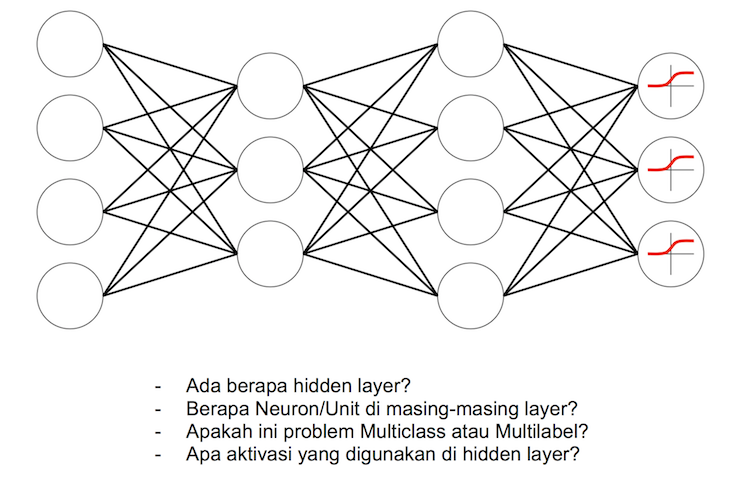

In [9]:
illustration.quiz

In [10]:
from torch import nn

In [11]:
nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid()
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

# STEP 3: Training Preparation

## Model

In [12]:
model = nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid()
)

## Criterion

#### criterion = nn.MSELoss() # model ended by Linear -> for regression

#### criterion = nn.NLLLoss() # model ended by logsoftmax -> for multiclass classification

#### criterion = nn.BCELoss() # model ended by sigmoid -> for binary clf, multilabel clf

In [13]:
criterion = nn.BCELoss()

## Optimizer

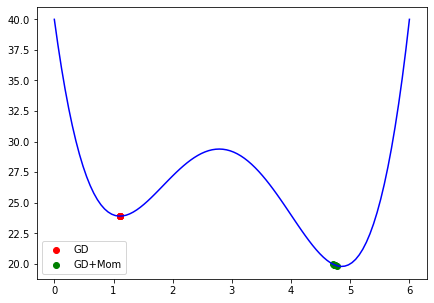

In [14]:
demo.momentum()

#### https://github.com/Jaewan-Yun/optimizer-visualization

In [15]:
from torch import optim

In [16]:
optimizer = optim.AdamW(model.parameters(), lr = 0.001)

In [17]:
from jcopdl.optim import RAdam, Ranger, RangerLARS, Ralamb
# another option for optimizer

# STEP 4: Training Loop

In [21]:
epochs = 500
for i in range(epochs):
    model.train()
    for feature, target in trainloader:
        output = model(feature) # feed forward
        loss  = criterion(output, target)
        loss.backward() # Backpropagation

        optimizer.step # update weight
        optimizer.zero_grad()
        
    print(f'\rEpoch: {i/1}/{epochs}', end =" ")

Epoch: 499.0/500 

In [24]:
epochs = 500
train_cost = []
for i in range(epochs):
    model.train()
    cost = 0
    for feature, target in trainloader:
        output = model(feature) # feed forward
        loss  = criterion(output, target)
        loss.backward() # Backpropagation

        optimizer.step # update weight
        optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    train_cost.append(cost / len(train_set))
        
    print(f"\rEpoch: {i+1:4}/{epochs:4} | train_cost: {train_cost[-1]:.4f}", end =" ")

Epoch:  500/ 500 | train_cost: 0.7025 

In [25]:
import matplotlib.pyplot as plt

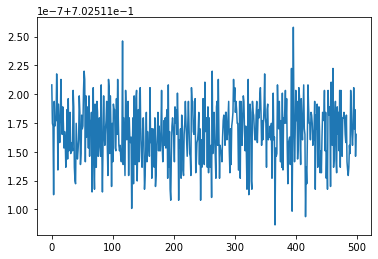

In [26]:
 plt.plot(train_cost)